# K Means Clustering

### Introduction to Clustering

- **Unsupervised Learning**:

  - Focuses on finding patterns in **unlabeled data**.
  - **Clustering** is a key unsupervised learning technique.

- **Clustering**:

  - Groups similar data points into **clusters** to reveal structure.
  - No predefined categories or labels.

- **Applications of Clustering**:

  - **Recommendation engines**: Personalize user experience.
  - **Search engines**: Group similar search results.
  - **Market segmentation**: Group customers based on various factors.
  - **Image segmentation**: Medical imaging, self-driving cars.
  - **Text clustering**: Group similar documents.

- **Iris Data Set**:
  - A classic example used to demonstrate natural clusters in data.


### K-Means Clustering

- **Goal**: Group similar data into clusters.
- **Key Concepts**:
  - **k**: Number of clusters.
  - **Means**: Minimize the average distance to each cluster's centroid.
- **Steps**:

  1. Place k random centroids.
  2. Assign data to the nearest centroid.
  3. Recalculate centroids.
  4. Repeat until convergence.

- **Convergence**: Points stop moving between clusters, and centroids stabilize.

- **Inference**: Assign new data to clusters based on trained centroids.


## Iris Dataset

The Iris dataset is one of the most popular datasets used in machine learning. It contains measurements of the sepals and petals from three different species of iris plants:

- **Iris setosa**
- **Iris versicolor**
- **Iris virginica**

The dataset includes 150 samples, with 50 samples from each species. Each sample has four features:

- **Sepal length** (in cm)
- **Sepal width** (in cm)
- **Petal length** (in cm)
- **Petal width** (in cm)

These features describe the size and shape of each flower, and the goal is to use them to cluster the samples based on their species. For example, we can apply the k-means algorithm to identify natural groupings of the data points (species) based on these measurements.

This dataset is frequently used to demonstrate the concept of clustering, classification, and other machine learning techniques.


In [25]:
from sklearn import datasets

iris = datasets.load_iris()

# print(iris.data)
# print(iris.target)

print(iris.data[0, :], iris.target[0])
print(iris.DESCR)

[5.1 3.5 1.4 0.2] 0
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for ea

### Visualize Before K-Means

Before applying the k-means algorithm, it's helpful to visualize the dataset to gain insights. Since the Iris dataset contains four features, we can simplify things by visualizing two features at a time. For example, we can create a scatter plot to display the relationship between sepal length and sepal width.

In the Iris dataset, these features are stored in specific columns:

- Sepal length is in column 0.
- Sepal width is in column 1.

By plotting these two features, we can begin to see how the data points are distributed in two-dimensional space. This kind of visualization helps us understand the potential clusters even before running the k-means algorithm. For example, clusters may be more apparent when plotted in 2D, revealing how similar or different the data points are from one another.

Now, after plotting the scatter plot, we can explore patterns, like the concentration of points or their spread, which will later help us understand how well k-means is clustering these points.


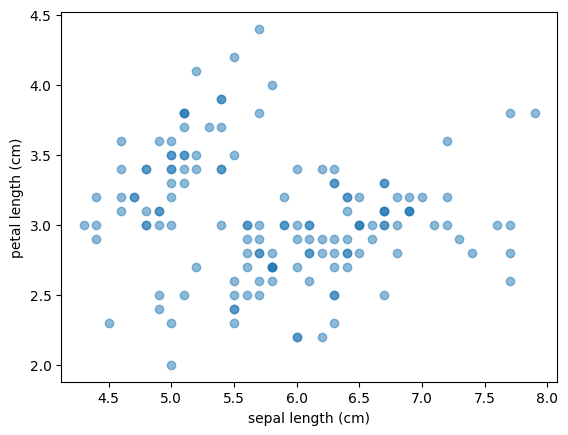

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Store iris.data
samples = iris.data

# Create x and y
x = samples[:, 0]
y = samples[:, 1]

combined = np.array(list(zip(x, y)))

# Plot x and y
plt.scatter(x, y, alpha=0.5)

plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")

# Show the plot
plt.show()


## Implementing K-Means


### Implementing K-Means: Step 1

The K-Means algorithm follows a structured process:

1. **Place k random centroids for the initial clusters.**
2. **Assign data samples to the nearest centroid.**
3. **Update centroids based on the assigned data samples.**
4. **Repeat Steps 2 and 3 until convergence.**

After visualizing the Iris dataset through a scatter plot, we can begin implementing the K-Means algorithm. In this case, we expect to find three clusters, corresponding to the three species of Iris flowers.

**Step 1** involves creating three random initial centroids and plotting them along with our samples. Since we know the expected number of clusters (k=3), we can proceed with this assumption. However, in practice, determining the optimal number of clusters is a critical step, which we will explore later.

Using the NumPy library, we will generate three random centroids within the range of the features of the dataset. This will set the stage for the next steps in the K-Means algorithm.


[[5.37584825 2.55976226]
 [5.48601441 2.40497251]
 [7.28679369 3.33428231]]


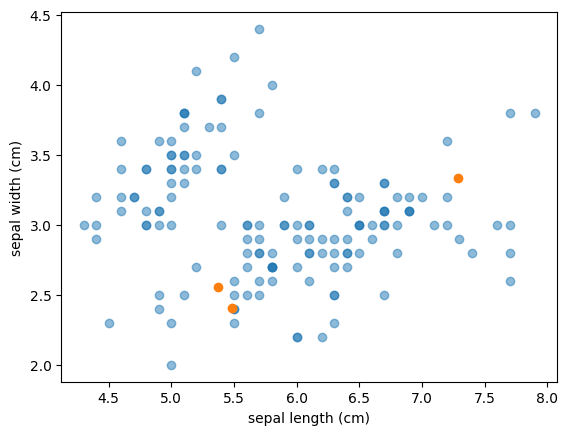

In [27]:
# Number of clusters
k = 3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size=k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size=k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

### Implementing K-Means: Step 2

In this step of the K-Means algorithm, we will assign data samples to their nearest centroids.

#### Steps to Follow:

1. **Random Centroids:** We have already established three random centroids.
2. **Distance Calculation:** To determine which centroid each data point is closest to, we'll use the Euclidean distance formula.

#### Euclidean Distance

The Euclidean distance between two points in a 2D plane can be calculated using the Pythagorean theorem. Given two points $((x_1, y_1))$ and $((x_2, y_2))$, the Euclidean distance is:

$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

This distance represents the length of the hypotenuse of a right triangle formed by these two points.

Another distance metric you may encounter is the taxicab (or Manhattan) distance, which measures the distance traveled along the axes in a grid-like path.

For our implementation, we will focus on the **Euclidean distance**.

#### Distance Function

We will create a distance function to compute the distance between a given data point and each of the centroids.

After defining this function, we will iterate through our dataset and compute the distance from each data sample to the three centroids.

Suppose we have a data point and a list of distances to the centroids, such as `distances = [15, 20, 5]`. We want to assign this data point to the centroid that has the minimum distance. The centroid with the smallest distance will be chosen as the closest, allowing us to categorize the data point accordingly.


In [28]:
# Distance formula
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one + two) ** 0.5
    return distance


# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))


# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid


# Assign the nearest centroid to each sample
for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

# Print labels
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 0. 2. 0. 2. 0. 1. 0. 1. 1. 0. 2. 0. 1. 1. 1. 0. 1.
 1. 1. 2. 2. 2. 2. 0. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 2. 1. 2. 1. 2. 2. 0. 2. 2. 2. 2. 1. 2. 1. 0. 2. 2. 2. 2. 1.
 2. 0. 2. 1. 2. 2. 1. 0. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 0. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 0.]


### Implementing K-Means: Step 3

In this step of the K-Means algorithm, we will update the centroids based on the data samples assigned to each cluster.

#### Steps to Follow:

1. **Recalculate Centroids:** After assigning each data sample to its nearest centroid, the next step is to update the positions of the centroids. This is done by finding the average (mean) of all data points assigned to each centroid.

2. **Average Calculation:** To find the new centroid for each cluster, we can use the `.mean()` function on the assigned points for that cluster. The new centroid will represent the center of all points in that cluster.

3. **Iterate:** This process of assigning data points to centroids and recalculating the centroids will be repeated until the centroids stabilize (i.e., do not change significantly between iterations), indicating convergence.

#### Convergence

Convergence in K-Means occurs when the centroids no longer change significantly or when the assignment of points to centroids remains constant. At this point, we have effectively grouped our data into clusters based on their similarities.


In [29]:
from copy import deepcopy

centroids_old = deepcopy(centroids)

for i in range(k):
    points = [combined[j] for j in range(len(combined)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[5.37584825 2.55976226]
 [5.48601441 2.40497251]
 [7.28679369 3.33428231]]
- - - - - - - - - - - - - -
[[5.21066667 3.23466667]
 [5.96875    2.584375  ]
 [6.85348837 3.1       ]]


### Implementing K-Means: Step 4

In this step, we will implement the final part of the K-Means algorithm, where we repeatedly execute Steps 2 and 3 until the centroids stabilize, indicating convergence.

#### Steps to Follow:

1. **While Loop:** We will use a `while` loop to continuously execute the assignment of data samples to centroids and the updating of centroids. This loop will keep running until convergence is reached.

2. **Error Calculation:** Within the loop, we need to create an array named `errors` to track the differences between the updated centroids and the old centroids. Specifically, for each centroid, we will calculate the absolute difference.

3. **Convergence Condition:** The loop will continue until all values in the `errors` array are zero, which means that the centroids have not changed between iterations, and the algorithm has converged.

4. **Execution of Steps 2 and 3:** Inside the loop, include the operations from Step 2 (assigning data samples to the nearest centroid) and Step 3 (updating the centroids).

By implementing this loop, we ensure that the K-Means algorithm iteratively refines the clusters until the centroids are stable.


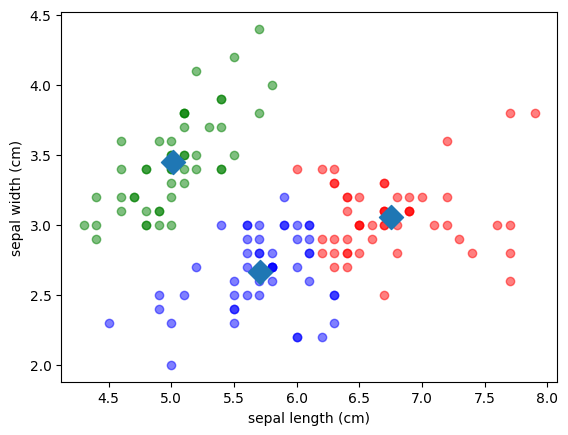

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:, 0]
y = samples[:, 1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids
k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))


def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one + two) ** 0.5
    return distance


# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid


# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
    error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:
while error.all() != 0:
    # Step 2: Assign samples to nearest centroid

    for i in range(len(samples)):
        labels[i] = assign_to_centroid(samples[i], centroids)

    # Step 3: Update centroids

    centroids_old = deepcopy(centroids)

    for i in range(k):
        points = [
            sepal_length_width[j]
            for j in range(len(sepal_length_width))
            if labels[j] == i
        ]
        centroids[i] = np.mean(points, axis=0)
        error[i] = distance(centroids[i], centroids_old[i])

colors = ["r", "g", "b"]

for i in range(k):
    points = np.array(
        [sepal_length_width[j] for j in range(len(samples)) if labels[j] == i]
    )
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="D", s=150)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()


## Implementing K-Means: Scikit-Learn

Congratulations on implementing K-Means clustering from scratch! Now, let's explore how to efficiently use the **scikit-learn** library to perform K-Means clustering.

#### Advantages of Scikit-Learn:

1. **Efficiency**: Using scikit-learn simplifies the implementation process, reducing the likelihood of mistakes and typos.
2. **Feature Handling**: Scikit-learn can handle datasets with numerous features, allowing us to use all four features of the Iris dataset instead of just two.
3. **Reliability**: As a widely-used open-source library, scikit-learn is well-tested and less prone to errors. There is also a wealth of online resources available for troubleshooting.

#### Steps to Implement K-Means with Scikit-Learn:

1. **Import KMeans**:
   Start by importing the KMeans class from the sklearn.cluster module.

2. **Build the Model**:
   Create a model that finds the specified number of clusters (k) using the KMeans class. Set the number of clusters using the appropriate argument.

3. **Fit the Model**:
   Compute K-Means clustering on your dataset using the fit method.

4. **Predict Clusters**:
   After fitting the model, determine the closest cluster each sample in the dataset belongs to using the predict method.

By following these steps, you can effectively implement K-Means clustering using scikit-learn, taking advantage of its powerful features and user-friendly interface.


In [31]:
from sklearn.cluster import KMeans

samples = iris.data

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters=3)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to determine the labels of samples
labels = model.predict(samples)

# Print the labels
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### New Data?

After using K-Means to identify three clusters in your sample data, you can enhance your model's functionality by applying it to new data samples. This is one of the exciting features of K-Means clustering!

#### Predicting New Samples:

Once you have trained your K-Means model, you can use it to predict the cluster labels for new data samples. This is done using the `.predict()` method.

#### Example:

Imagine you visited a florist and purchased three new Iris plants with the following measurements:

- **Sample 1**: [5.1, 3.5, 1.4, 0.2]
- **Sample 2**: [3.4, 3.1, 1.6, 0.3]
- **Sample 3**: [4.9, 3.0, 1.4, 0.2]

You can input this new data into your K-Means model to obtain the corresponding cluster labels. This capability allows you to seamlessly integrate new samples into your existing clustering analysis, making your model more versatile and useful in real-world applications.


In [32]:
# Store the new Iris measurements
new_samples = np.array(
    [[5.7, 4.4, 1.5, 0.4], [6.5, 3.0, 5.5, 0.4], [5.8, 2.7, 5.1, 1.9]]
)

# Predict labels for the new_samples
new_labels = model.predict(new_samples)

print(new_labels)

new_names = [iris.target_names[label] for label in new_labels]

print(new_names)

[1 0 0]
['versicolor', 'setosa', 'setosa']


### Visualize After K-Means

After completing the K-Means clustering using the scikit-learn library, we have accomplished the following steps:

1. Loaded the embedded Iris dataset.
2. Computed K-Means on the dataset, with the number of clusters set to 3.
3. Predicted the labels for the data samples, which resulted in cluster labels of 0, 1, or 2.

#### Creating a Scatter Plot:

To visualize the results, let's create a scatter plot of the Iris data once again. This time, we will use the predicted labels as the colors for the points in the plot. This will allow us to see how the different species are clustered based on their features.

Here’s how to visualize it:

- Set the `c` parameter in the scatter plot to the predicted labels to differentiate the clusters by color.
- Label the x-axis as 'sepal length (cm)' and the y-axis as 'sepal width (cm)'.

This visualization will provide insights into how well the K-Means algorithm has clustered the Iris data based on the selected features.


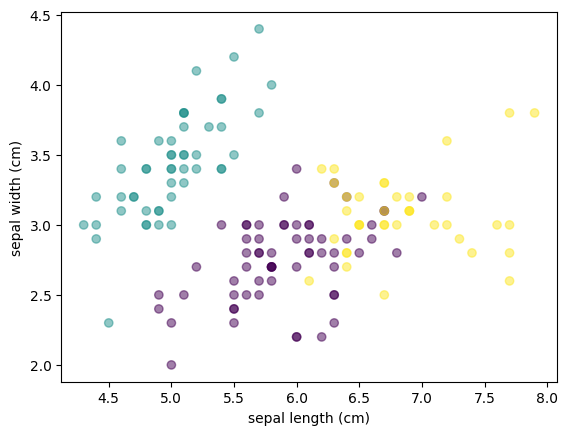

In [33]:
x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

### Evaluation of K-Means Clustering

After clustering the Iris dataset into three groups, it's essential to evaluate how well these clusters correspond to the actual species of Iris flowers.

#### Understanding Target Values:

The Iris dataset includes target values that represent the species:

- 0 corresponds to Iris-setosa
- 1 corresponds to Iris-versicolor
- 2 corresponds to Iris-virginica

By converting these target values into species names, we can better interpret our clustering results.

#### Cross-Tabulation Analysis:

Using cross-tabulation, we can examine the relationship between the predicted cluster labels and the actual species. This analysis will provide a clear view of how many samples from each species were assigned to each cluster.

The resulting table will show:

- The first column with cluster labels.
- The subsequent columns indicating how many samples of each species were grouped into the respective clusters.

From this analysis, we can draw conclusions about the accuracy of our clustering:

- **Iris-setosa** was clustered with 100% accuracy.
- **Iris-versicolor** was clustered with approximately 96% accuracy.
- **Iris-virginica** had a lower clustering accuracy.

This evaluation helps us understand the effectiveness of the K-Means algorithm in classifying the Iris dataset based on the selected features.


In [34]:
import pandas as pd

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = [iris.target_names[s] for s in model.predict(samples)]

species = [iris.target_names[t] for t in list(target)]

df = pd.DataFrame({"labels": labels, "species": species})

ct = pd.crosstab(df["labels"], df["species"])

print(ct)

species     setosa  versicolor  virginica
labels                                   
setosa           0          48         14
versicolor      50           0          0
virginica        0           2         36


### The Number of Clusters in K-Means Clustering

In the previous steps, we grouped the Iris plants into three clusters based on our assumption of three species. However, if we were unaware of the number of species, determining the optimal number of clusters is essential.

#### Defining Good Clustering

A good clustering result is characterized by tight clusters, where samples within each cluster are closely grouped. The effectiveness of clustering can be measured using **inertia**, which quantifies how spread out the clusters are. Inertia is defined as the sum of squared distances from each sample to its corresponding cluster centroid. Lower inertia values indicate better clustering performance.

#### Optimal Number of Clusters

To determine the optimal number of clusters, we can graph the inertia against different values of \( k \) (the number of clusters). Typically, the inertia will decrease as \( k \) increases. However, it's essential to find a balance:

- **High Inertia**: Indicates that clusters are not closely packed.
- **Too Many Clusters**: Can lead to clusters that are not distinct enough.

#### The Elbow Method

One effective way to identify the optimal number of clusters is the **elbow method**. In this method, we look for an "elbow" point on the graph where the decrease in inertia begins to slow down significantly. This point represents a suitable trade-off between a low inertia value and a manageable number of clusters.

For the Iris dataset, the graph suggests that the optimal number of clusters is **3**, corresponding to the known species.


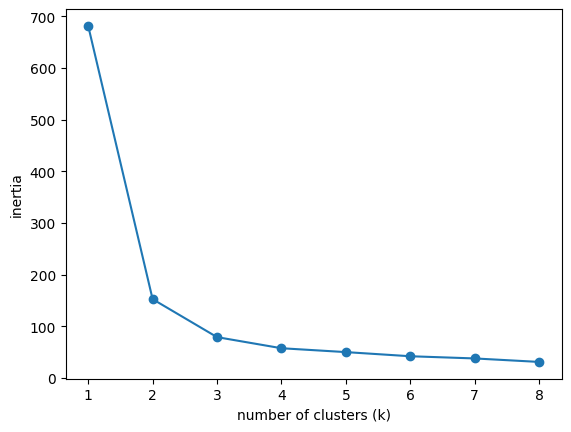

In [35]:
num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, "-o")

plt.xlabel("number of clusters (k)")
plt.ylabel("inertia")

plt.show()